In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
from IPython.display import display

from dlp.dataset import Dataset

from parksim.intent_predict.irl.data_processing.utils import IrlDataProcessor

# Load dataset

In [2]:
# Load dataset
ds = Dataset()

home_path = str(Path.home())
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

In [3]:
extractor = IrlDataProcessor(ds = ds)

840d7356e46973280c5e71d628fc3b240bfd040a
0a72735ac3b5f6f50bfa50ad8e91ac3e40277854


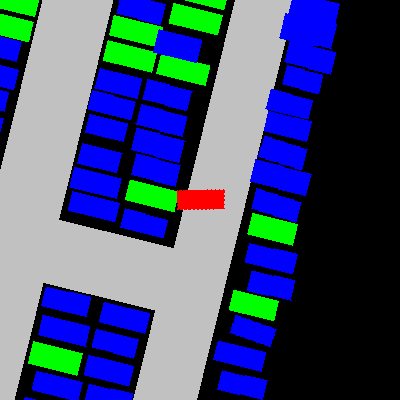

In [5]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[0]
inst_token = frame['instances'][0]

instance = ds.get('instance', inst_token)
current_state = np.array([instance['coords'][0], instance['coords'][1], instance['heading'], instance['speed']])

img_frame = extractor.vis.plot_frame(frame['frame_token'])
img = extractor.vis.inst_centric(img_frame, inst_token)
display(img)

In [6]:
agent_centers = extractor.detect_center(inst_token, 'agent')

for center_ground in agent_centers:
    print(center_ground)

    local_offset = extractor.compute_relative_offset(inst_token, center_ground)
    print(local_offset)

    speed = extractor.get_agent_speed(inst_token, center_ground)
    print(speed)

In [7]:
spot_centers = extractor.detect_center(inst_token, 'spot')

thres = 3.5

for center_ground in spot_centers:
    print(center_ground)

    local_offset = extractor.compute_relative_offset(inst_token, center_ground)
    print(local_offset)

    astar_dist, astar_dir, astar_graph = extractor.compute_Astar_dist_dir(inst_token, center_ground)
    print(astar_dist, astar_dir)

    nearby_agents = 0
    for center_agent in agent_centers:
        dist = astar_graph.dist_to_graph(center_agent)
        if dist < thres:
            nearby_agents += 1

    print("nearby_agents:", nearby_agents)

[69.73367049 53.16821141]
[-14.52353058  15.79412231]
36.38942766408895 -0.23982829501106304
nearby_agents: 0
[79.62742351 71.17990367]
[ 5.33529816 10.50882874]
7.539999999999992 -0.23982829501106304
nearby_agents: 0
[87.48561819 71.17756824]
[7.21764832 2.87941284]
0 0
nearby_agents: 0
[87.83579183 58.67578426]
[-4.83529358 -0.45882263]
0 0
nearby_agents: 0
[100.83575297  58.67567075]
[ -1.71764526 -13.07941132]
13.0 0.23982829501106304
nearby_agents: 0
[100.82685788  53.17006508]
[ -7.0647049  -14.39117584]
46.40365249587791 -0.23982829501106304
nearby_agents: 0
[103.44630046  53.15311858]
[ -6.45294037 -16.93823509]
49.0036524958779 -0.23982829501106304
nearby_agents: 0
[100.83569047  41.31005049]
[-18.57647047 -17.24411774]
46.40365249587791 -0.23982829501106304
nearby_agents: 0
[106.026063    58.66589584]
[ -0.48235168 -18.12058811]
18.200000000000003 0.23982829501106304
nearby_agents: 0
[102.84876204  41.30353941]
[-18.1 -19.2]
49.0036524958779 -0.23982829501106304
nearby_agents

In [8]:
label = extractor.get_intent_label(inst_token, spot_centers)
print(label)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
